# Q1: Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

### To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

- Removing punctuations like., ! $( ) * % @
- Removing URLs
- Removing Stop words
- Lower casing
- Tokenization
- Stemming
- Lemmatization
- Sentence Segmentation

## Apply these preprocessing steps on given data sets or you can take any public datasets of your choice. 

### Sample Datasets:
- Large Movie Review Dataset
- Sentimental Analysis for Tweets
- E-Mail Spam classification

In [13]:
# !pip install wordcloud

In [12]:
import pandas as pd # for reading csv file
from wordcloud import WordCloud # for wordcloud
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs

import re # regex, for normalizing text
import nltk # for normalizing text
from nltk.corpus import stopwords # for removing stop words i.e. common words
from nltk.stem import WordNetLemmatizer # for bringing all words to base words
from nltk.tokenize import word_tokenize # for tokenizing 

In [64]:
df = pd.read_csv('sentiment_tweets3.csv')
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [65]:
df.drop('Index', axis=1, inplace = True)

In [66]:
df.tail()

,message to examine,label (depression result)
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1
10313,0,1


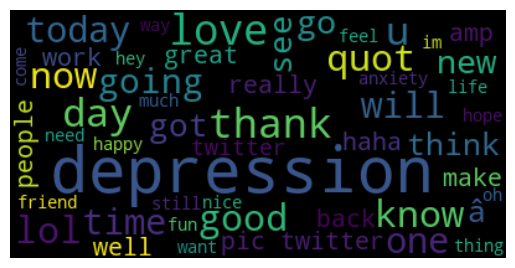

In [67]:
text = ' '.join(df['message to examine'])
wordcloud = WordCloud(max_words=50).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: xlabel='label (depression result)'>

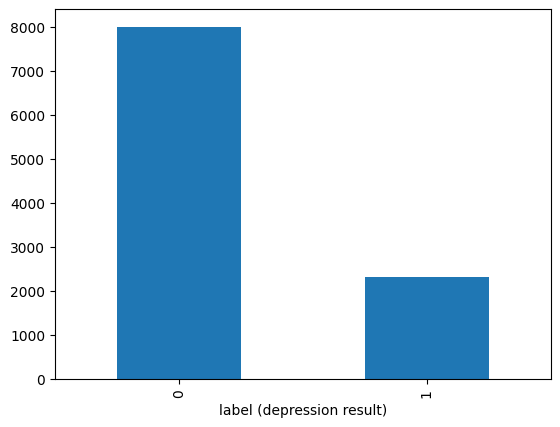

In [68]:
df.groupby('label (depression result)').size().plot(kind='bar')

In [69]:
# printing the first 10 rows

for i in range(10):
    print(df['message to examine'][i], "\n")

just had a real good moment. i missssssssss him so much,  

is reading manga  http://plurk.com/p/mzp1e 

@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8  

@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.  

ADD ME ON MYSPACE!!!  myspace.com/LookThunder 

so sleepy. good times tonight though  

@SilkCharm re: #nbn as someone already said, does fiber to the home mean we will all at least be regular now  

23 or 24ï¿½C possible today. Nice  

nite twitterville  workout in the am  -ciao 

@daNanner Night, darlin'!  Sweet dreams to you  



In [70]:
# using regex to normalize the text and remove the URL links 

df['clean_message'] = df['message to examine'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]+', ' ', x))
df['clean_message'] = df['message to examine'].apply(lambda x: re.sub(r'http\S+', ' ', x))

df.head()

,message to examine,label (depression result),clean_message
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder


In [71]:
# removing stop words (repetative words that dont have weight)
# nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['clean_message'] = df['clean_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df.head()

,message to examine,label (depression result),clean_message
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need send 'em accountant tomorrow. Odd...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder


In [72]:
# making all the words lowercase

df['clean_message'] = df['clean_message'].str.lower()
df.head()

,message to examine,label (depression result),clean_message
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder


In [73]:
# tokenizing words

df['tokenized_clean_message'] = df['clean_message'].apply(word_tokenize)
df.head()

,message to examine,label (depression result),clean_message,tokenized_clean_message
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,","[real, good, moment, ., missssssssss, much, ,]"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga,"[reading, manga]"
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,"[@, comeagainjen, -]"
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...,"[@, lapcat, need, send, 'em, accountant, tomor..."
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,"[add, me, on, myspace, !, !, !, myspace.com/lo..."


In [75]:
# applying lemmatization

lemmatizer = WordNetLemmatizer()

df['lemmatized_tokenized_clean_message'] = df['tokenized_clean_message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df.head()

,message to examine,label (depression result),clean_message,tokenized_clean_message,lemmatized_tokenized_clean_message
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,","[real, good, moment, ., missssssssss, much, ,]","[real, good, moment, ., miss, much, ,]"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga,"[reading, manga]","[reading, manga]"
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,"[@, comeagainjen, -]","[@, comeagainjen, -]"
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...,"[@, lapcat, need, send, 'em, accountant, tomor...","[@, lapcat, need, send, 'em, accountant, tomor..."
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,"[add, me, on, myspace, !, !, !, myspace.com/lo...","[add, me, on, myspace, !, !, !, myspace.com/lo..."


In [76]:
# bringing the tokens back to sentence format for the tfidf vectorizer

df['lemmatized_text'] = df['lemmatized_tokenized_clean_message'].apply(lambda x: ' '.join(x))
df.head()

,message to examine,label (depression result),clean_message,tokenized_clean_message,lemmatized_tokenized_clean_message,lemmatized_text
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,","[real, good, moment, ., missssssssss, much, ,]","[real, good, moment, ., miss, much, ,]","real good moment . miss much ,"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga,"[reading, manga]","[reading, manga]",reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,"[@, comeagainjen, -]","[@, comeagainjen, -]",@ comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...,"[@, lapcat, need, send, 'em, accountant, tomor...","[@, lapcat, need, send, 'em, accountant, tomor...",@ lapcat need send 'em accountant tomorrow . o...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder,"[add, me, on, myspace, !, !, !, myspace.com/lo...","[add, me, on, myspace, !, !, !, myspace.com/lo...",add me on myspace ! ! ! myspace.com/lookthunder


# Q2: Apply four different machine learning algorithms on one of the preprocessed datasets from Q1 and perform a comparative analysis. 

## Steps to follow:

### Data Preparation:
- Split the preprocessed dataset into training and testing sets.
- Extract features using techniques like TF-IDF.

### Model Building:
- Train each of the four algorithms on the training set.
- Evaluate the performance of each model on the testing set.

### Performance Metrics:
- Use accuracy, precision, recall, F1-score, and ROC-AUC as performance metrics.

### Comparative Analysis:
- Compare the performance metrics of the four models.
- Visualize the results using appropriate plots (e.g., bar charts, ROC curves).

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer # NLP technique for analyzing and understanding text data

# importing 4 different models for comparitive analysis
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# for evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix

X = df["lemmatized_text"]
y = df["label (depression result)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

tfidf = TfidfVectorizer()
logistic_regression = LogisticRegression()
naive_bayes = MultinomialNB()
decision_tree = DecisionTreeClassifier()
support_vector_machine = SVC()

# Pipeline: Chains the tfidf and ML algorithm steps together. 
# This ensures that the text data is first transformed into TF-IDF vectors before being passed to the ML model.

lr = Pipeline([("tfidf", tfidf), ("logistic_regression", logistic_regression)])
nb = Pipeline([("tfidf", tfidf), ("naive_bayes", naive_bayes)])
dt = Pipeline([("tfidf", tfidf), ("decision_tree", decision_tree)])
svm = Pipeline([("tfidf", tfidf), ("support_vector_machine", support_vector_machine)])

lr.fit(X_train, y_train)
nb.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_svm = svm.predict(X_test)

accuracylr = accuracy_score(y_test, y_pred_lr)
accuracynb = accuracy_score(y_test, y_pred_nb)
accuracydt = accuracy_score(y_test, y_pred_dt)
accuracysvm = accuracy_score(y_test, y_pred_svm)

print("Logistic Regression Accuracy:", accuracylr)
print("Naive Bayes Accuracy:", accuracynb)
print("Decision Tree Accuracy:", accuracydt)
print("SVM Accuracy:", accuracysvm)

Logistic Regression Accuracy: 0.9893410852713178
Naive Bayes Accuracy: 0.9108527131782945
Decision Tree Accuracy: 0.9525193798449613
SVM Accuracy: 0.9961240310077519


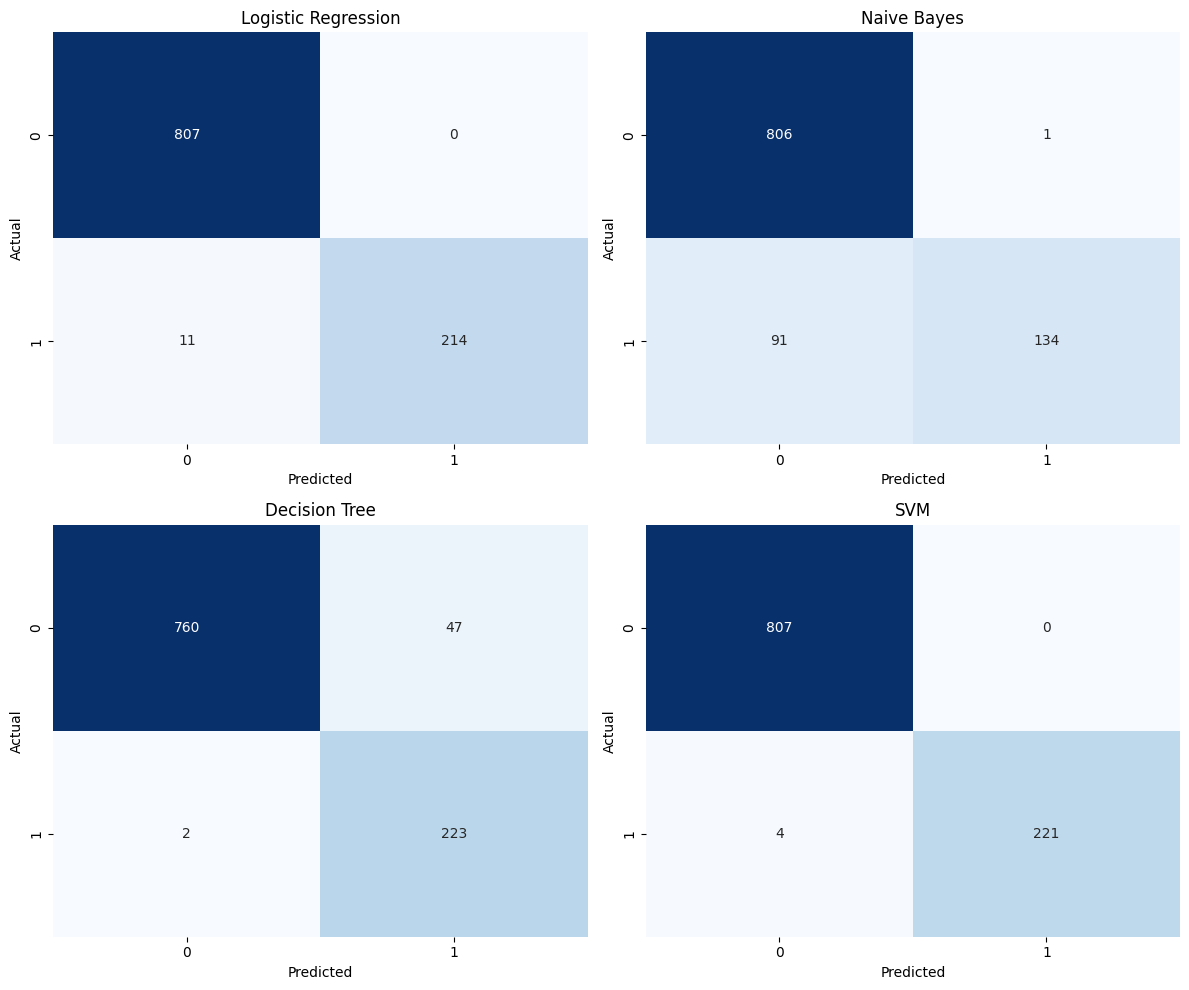

In [88]:
# creating confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# function to plot confusion matrix
def plot_confusion_matrix(cm, ax, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# plotting confusion matrices as subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_confusion_matrix(cm_lr, axes[0, 0], 'Logistic Regression')
plot_confusion_matrix(cm_nb, axes[0, 1], 'Naive Bayes')
plot_confusion_matrix(cm_dt, axes[1, 0], 'Decision Tree')
plot_confusion_matrix(cm_svm, axes[1, 1], 'SVM')

plt.tight_layout()
plt.show()

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Initialize lists to store the performance metrics for each model
models = ["Logistic Regression", "Naive Bayes", "Decision Tree", "SVM"]
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

# Evaluate each model and store the metrics
for model, y_pred in zip([lr, nb, dt, svm], [y_pred_lr, y_pred_nb, y_pred_dt, y_pred_svm]):
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
    # The hasattr function checks whether the model has a predict_proba method. 
    # If it does, we use predict_proba to get the probabilities of the positive class. 
    # Many classifiers (like Logistic Regression and Naive Bayes) have a predict_proba method 
    # that returns the probabilities for each class.
    
    # If not, we use decision_function. Some classifiers, like SVM with a linear kernel, 
    # do not have a predict_proba method but have a decision_function method.
    
    # Check if the model has the 'predict_proba' method
    if hasattr(model, "predict_proba"):
        # Get the predicted probabilities for the positive class (class 1)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Use the decision_function method to get the confidence scores
        y_pred_proba = model.decision_function(X_test)
        
    roc_aucs.append(roc_auc_score(y_test, y_pred_proba))

# Create a DataFrame for the performance metrics
metrics_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1-score": f1_scores,
    "ROC-AUC": roc_aucs
})

metrics_df.head()

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.989341,0.989484,0.989341,0.989244,0.996784
1,Naive Bayes,0.910853,0.919054,0.910853,0.902064,0.974892
2,Decision Tree,0.952519,0.959995,0.952519,0.953997,0.966435
3,SVM,0.996124,0.996143,0.996124,0.996111,0.995368


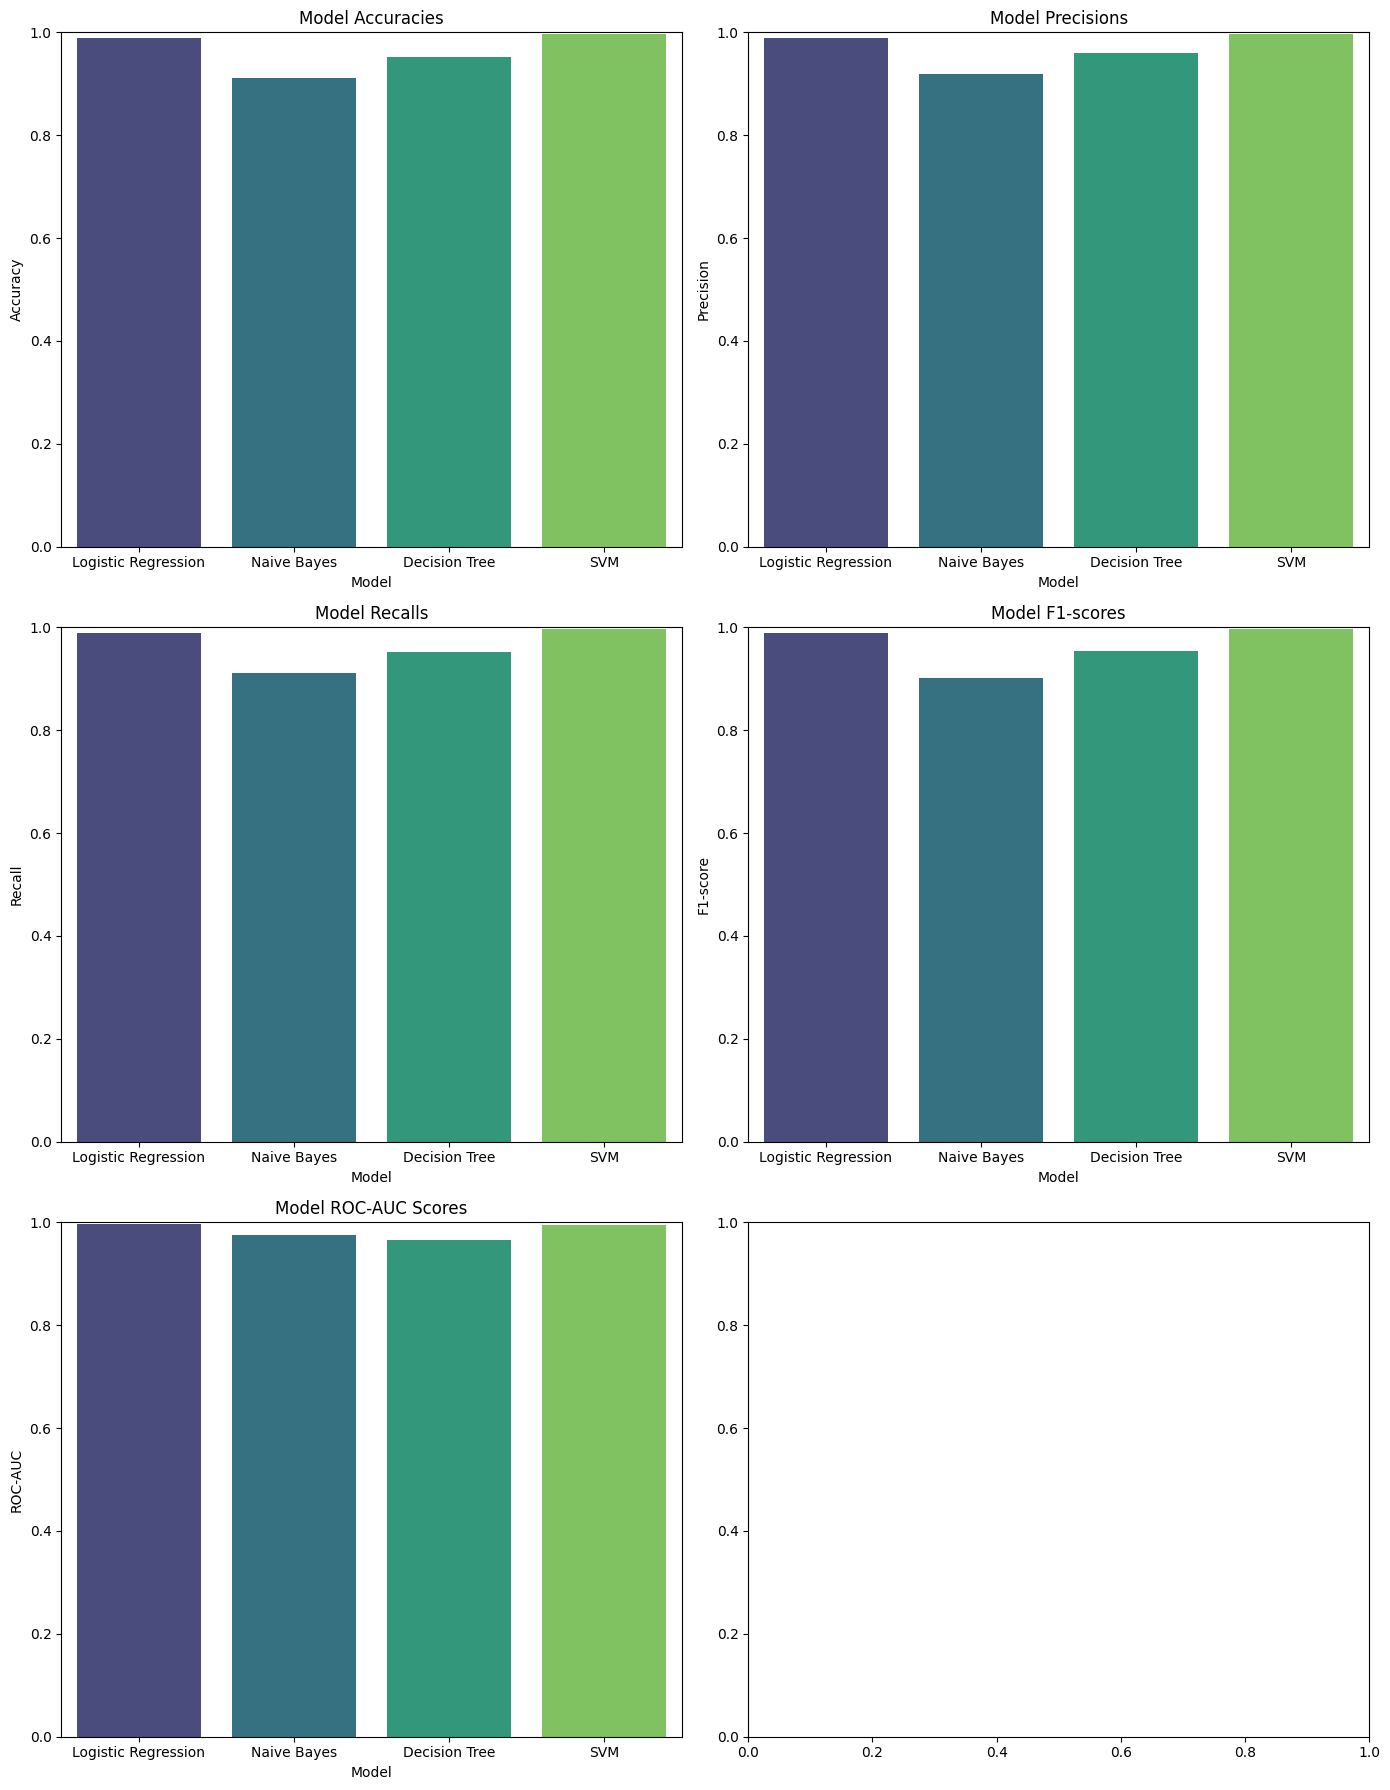

In [82]:
# Plotting the bar charts for each metric
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

sns.barplot(x="Model", y="Accuracy", data=metrics_df, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Model Accuracies")
axes[0, 0].set_ylim(0, 1)

sns.barplot(x="Model", y="Precision", data=metrics_df, palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title("Model Precisions")
axes[0, 1].set_ylim(0, 1)

sns.barplot(x="Model", y="Recall", data=metrics_df, palette="viridis", ax=axes[1, 0])
axes[1, 0].set_title("Model Recalls")
axes[1, 0].set_ylim(0, 1)

sns.barplot(x="Model", y="F1-score", data=metrics_df, palette="viridis", ax=axes[1, 1])
axes[1, 1].set_title("Model F1-scores")
axes[1, 1].set_ylim(0, 1)

sns.barplot(x="Model", y="ROC-AUC", data=metrics_df, palette="viridis", ax=axes[2, 0])
axes[2, 0].set_title("Model ROC-AUC Scores")
axes[2, 0].set_ylim(0, 1)

plt.tight_layout()
plt.show()

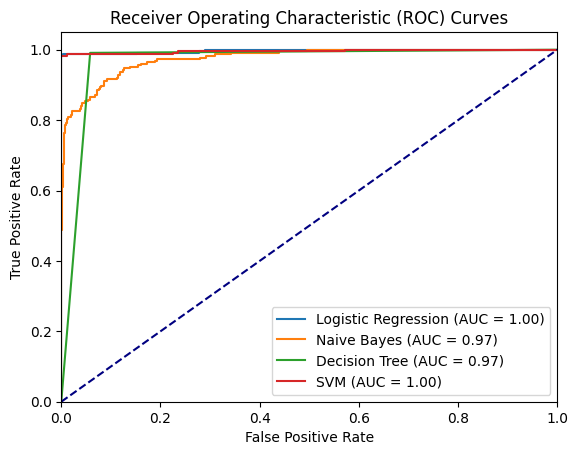

In [84]:
# Plotting the ROC curves

for model, label in zip([lr, nb, dt, svm], models):
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()